In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
start = '2012-01-01'
end = '2024-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113499,16.360895,16.107796,16.339823,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
3264,2024-12-23,195.766968,196.266399,191.411929,193.809192,15235900
3265,2024-12-24,197.345184,197.445061,194.975874,195.946768,6809800
3266,2024-12-26,196.875717,197.934509,195.647106,196.516126,7907900


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

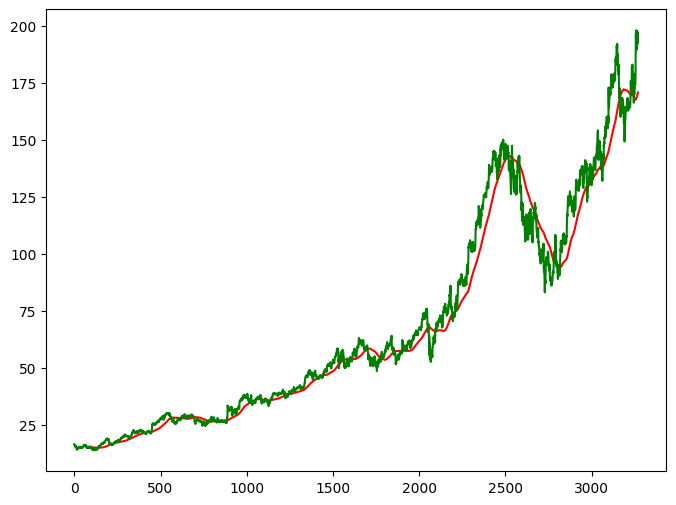

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

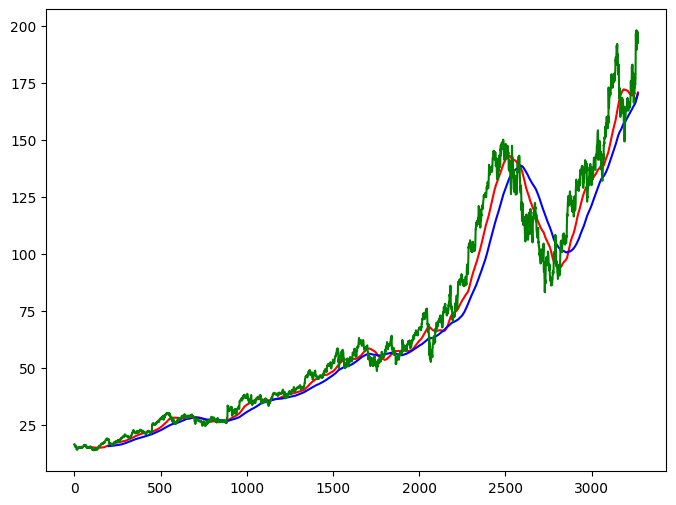

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

2615

In [ ]:
data_test.shape[0]

654

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train.shape[0]):
  x.append(data_train_scale[i-100: i])
  y.append(data_train_scale[i, 0])

In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x, y, epochs= 50, batch_size=32,  verbose =1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 272ms/step - loss: 0.0606
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 292ms/step - loss: 0.0062
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - loss: 0.0051
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 273ms/step - loss: 0.0048
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 293ms/step - loss: 0.0053
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: 0.0053
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 272ms/step - loss: 0.0046
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 290ms/step - loss: 0.0041
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - loss: 0.0039
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 273ms/step - loss: 0.0043
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 289ms/step - loss: 0.0040
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 285ms/step - loss: 0.0034
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 287ms/step - loss: 0.0031
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 287ms/step - loss: 0.0030
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step


In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict * scale

In [ ]:
y = y*scale

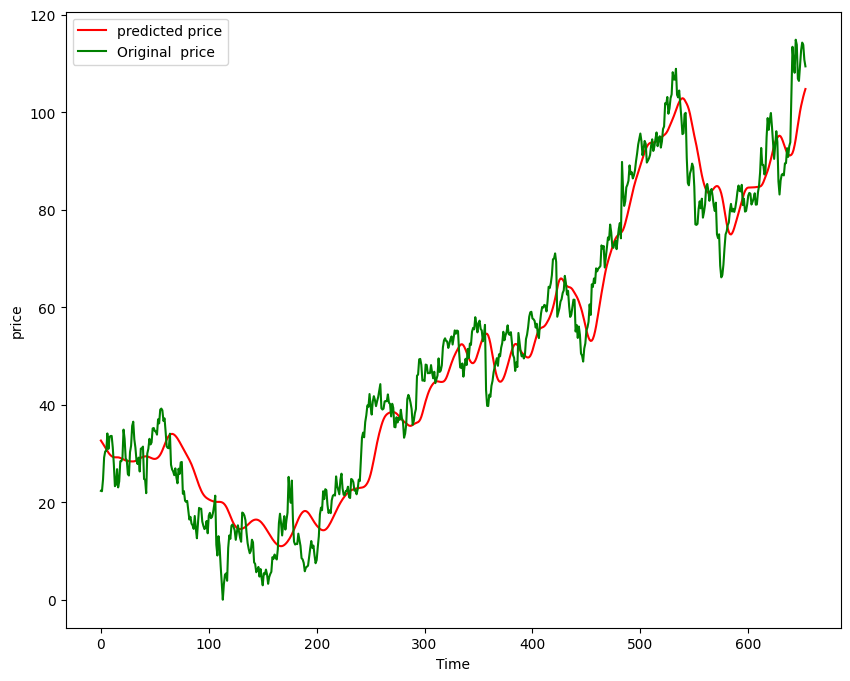

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'predicted price')
plt.plot(y, 'g', label = 'Original  price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
model.save('stock prediction model.keras')